<center><h1> <u>Heart Failure Prediction</u></h1></center>
<img src="https://images.pexels.com/photos/6765583/pexels-photo-6765583.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940" width="50%">

<a id="section1"></a>
# The problem and The data
<a id="subsection1"></a>
## Understanding the problem
<b>Let's understand the problem that we are going to solve.<br></b>
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.<br>

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.<br>
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.<br>

<a id="subsection2"></a>
## About the dataset
This dataset contains 12 features that can be used to predict mortality by heart failure.<br>
<b> age </b> : Age of the patient <br>
<b> anaemia </b> : 0 = N0, 1 = YES  <br>
<b> creatinine_phosphokinase </b> : measure of creatinine phosphokinase level in bloodstream <br>
<b> diabetes </b> : 0 = NO, 1 = YES <br>
<b> ejection_fraction </b> : The measurement of the percentage of blood leaving the heart each time it contracts. <br>
<b> high_blood_pressure </b> : 0 = NO, 1 = YES <br>
<b> platelets </b> : Count of platelets <br>
<b> serum_creatinine </b> : serum creatinine level <br>
<b> serum_sodium </b> :  measure of sodium in the body<br>
<b> sex </b> :  0 = FEMALE, 1 = MALE<br>
<b> smoking </b> : 0 = NO, 1 = YES <br>
<b> time </b> : the time at which DEATH_EVENT happened in days. For example; if the patient died, then it tells how many days it took to happen, if the patient survives, it tells how long recovery took.<br>
<b> DEATH_EVENT </b> : 0 = NO, 1 = YES (target) <br>

#### Source : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## Machine Learning Problem

- Supervised Learning
- Binary Classification
- No latency requirement
- Errors can be costly

In [ ]:
# Importing necessary python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('precision', 2)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('ggplot')

### Loading the data into memory

In [ ]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

print("Data loaded successfully!!")
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns are present in the data.")

Data loaded successfully!!
There are 299 rows and 13 columns are present in the data.


<a id="section2"></a>
# Exploratory Data Analysis



In [ ]:
# random sample of data
data.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
215,73.0,0,582,0,35,1,203000.00,1.30,134,1,0,195,0
177,49.0,1,69,0,50,0,132000.00,1.00,140,0,0,147,0
139,50.0,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0
92,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82,0
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1


In [ ]:
# remove time
data.drop('time', inplace=True, axis=1)

In [ ]:
# statistical summary
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [ ]:
# Null values
data.isna().mean().to_frame(name="% of null values")

,% of null values
age,0.0
anaemia,0.0
creatinine_phosphokinase,0.0
diabetes,0.0
ejection_fraction,0.0
high_blood_pressure,0.0
platelets,0.0
serum_creatinine,0.0
serum_sodium,0.0
sex,0.0


In [ ]:
# Unique values
data.nunique().to_frame(name="# of unique values")

,# of unique values
age,47
anaemia,2
creatinine_phosphokinase,208
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,176
serum_creatinine,40
serum_sodium,27
sex,2


### Variable Separation
Separating the features based on their data type.

In [ ]:
data.shape

(299, 12)

In [ ]:

features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking']

continuous_features = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine','serum_sodium']

discrete_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

target = 'DEATH_EVENT'

### Target distribution

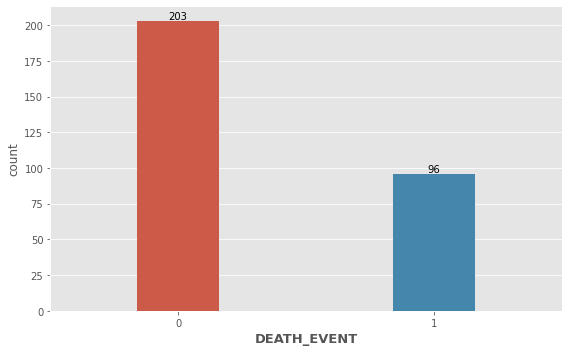

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=data[target], ax=ax)
ax.set_xlabel(target, fontsize=13, fontweight='bold')
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 0.4
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')
plt.tight_layout()

### Distribution of continuous features

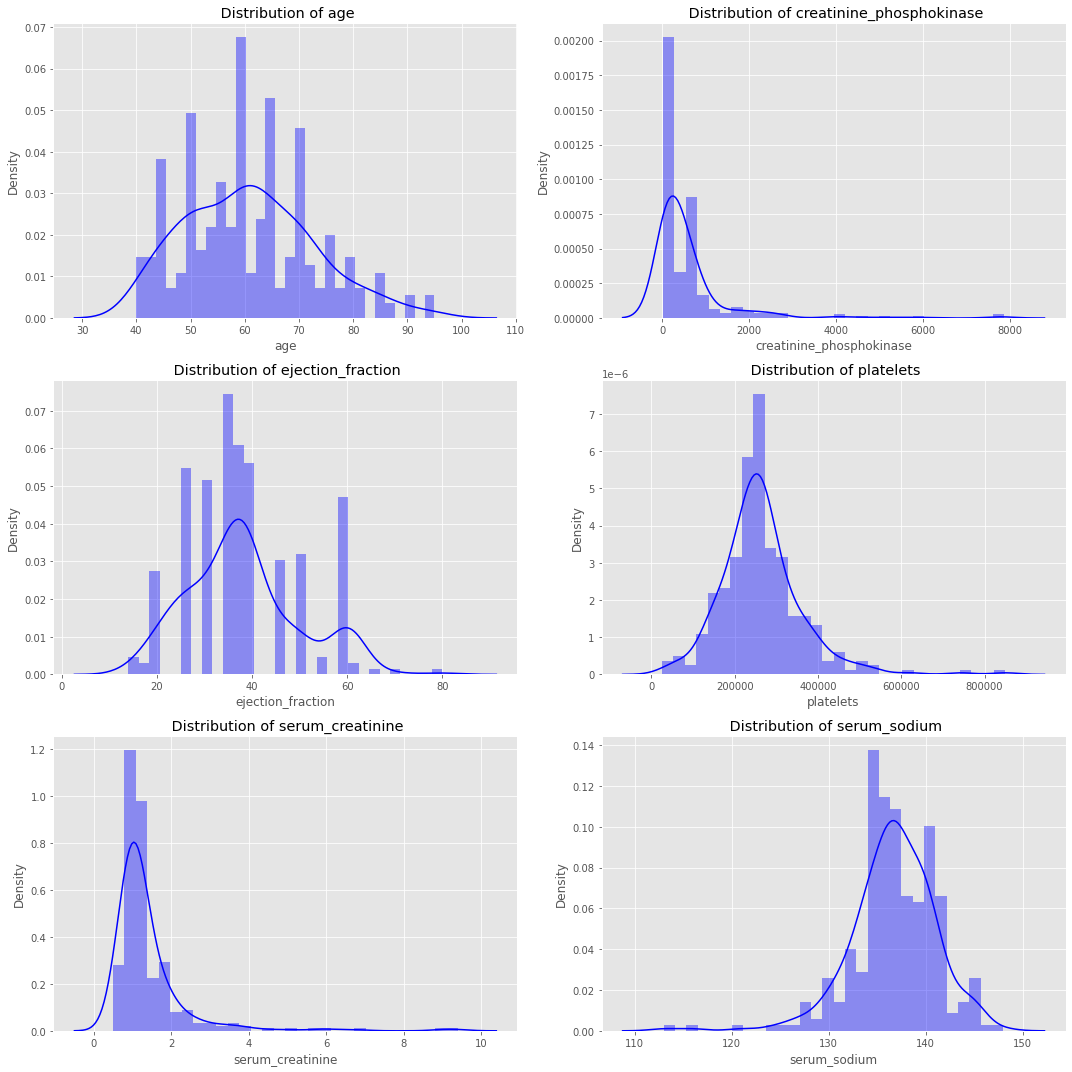

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
axes = np.ravel(axes)
for i, col in enumerate(continuous_features):
    sns.distplot(a=data[col], ax=axes[i], bins=30, color='blue')
    axes[i].set_title(f" Distribution of {col}")
plt.tight_layout()

### Distribution of discrete features

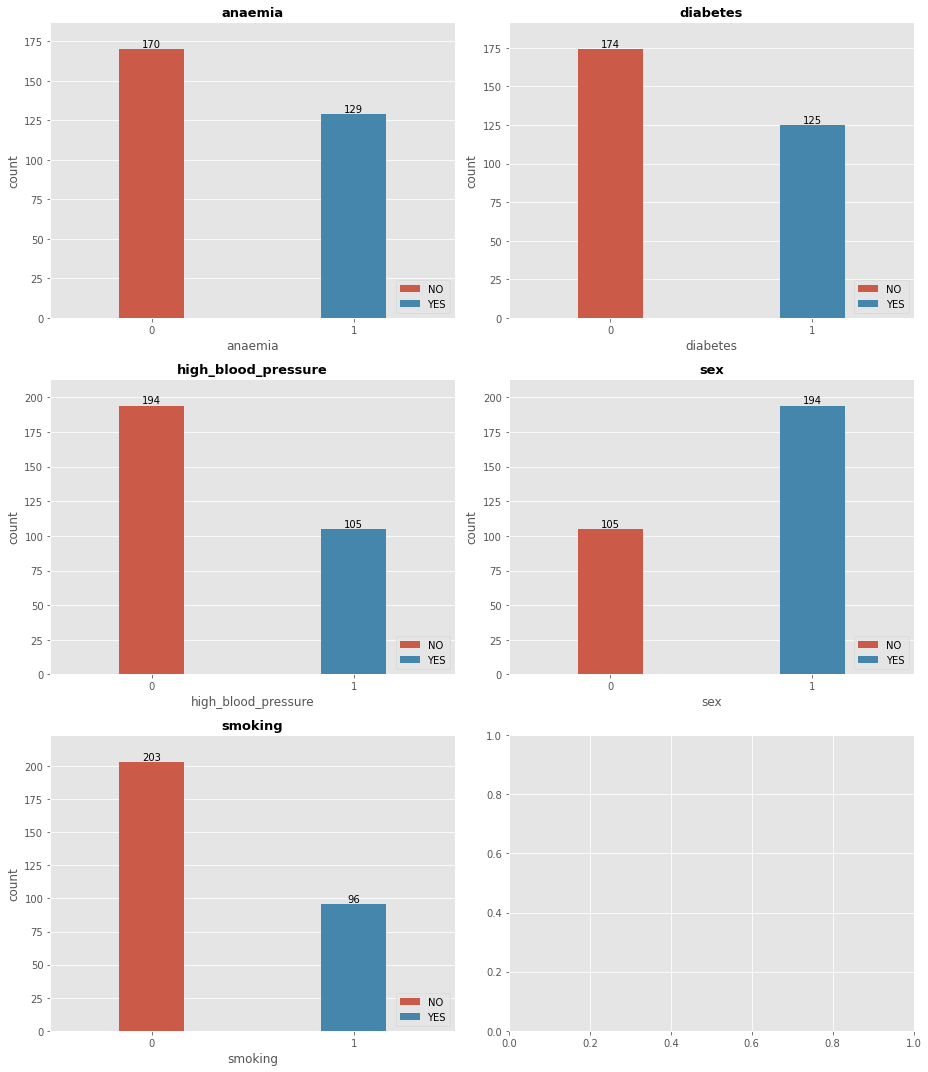

In [ ]:
## source: https://stackoverflow.com/questions/64946868/on-changing-the-bar-width-of-a-countplot-the-relative-position-of-the-bars-get
disc_data = data[discrete_features].astype('category')

fig, axes = plt.subplots(3,2, figsize=(13,15))
axes=np.ravel(axes)
for i, col in enumerate(discrete_features):
    sns.countplot(x=disc_data[col], ax=axes[i])
    axes[i].set_title(col, fontsize=13, fontweight='bold')
    for patch, label in zip(axes[i].patches, ["NO", "YES"]):
        height = patch.get_height()
        width = patch.get_width()
        new_width = width * 0.4
        patch.set_width(new_width)
        patch.set_label(label)
        x = patch.get_x()
        patch.set_x(x + (width - new_width) / 2)
        axes[i].text(x=x + width/2, y=height, s=height, ha='center', va='bottom')
            
    axes[i].legend(loc='lower right')
    axes[i].margins(y=0.1)
plt.tight_layout()
plt.show()

### Continuous features Vs Target (Box plot)

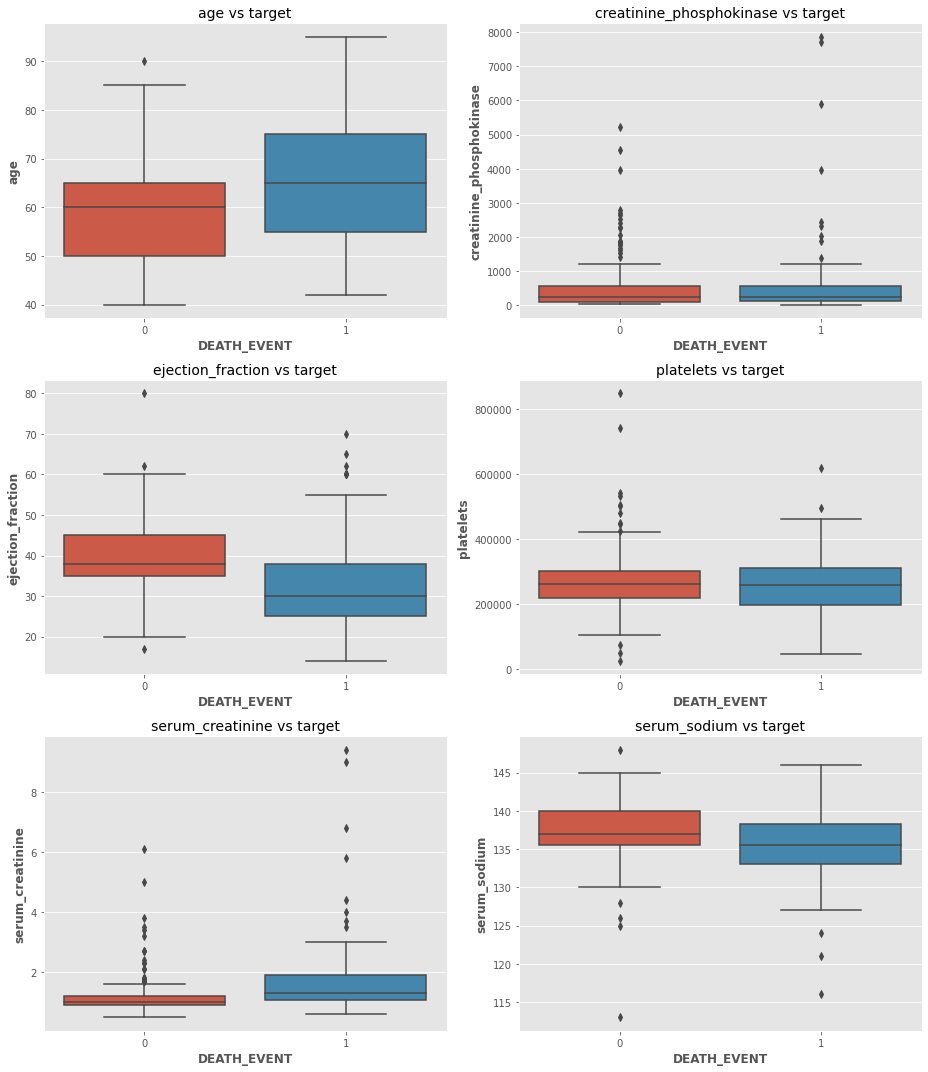

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(13,15))
axes=np.ravel(axes)

for i,col in enumerate(continuous_features):
    sns.boxplot(x = data[target], y = col, data=data, ax=axes[i])
    axes[i].set_ylabel(col, fontweight='bold')
    axes[i].set_xlabel(target, fontweight='bold')
    axes[i].set_title(f'{col} vs target', fontsize=14)
    
plt.tight_layout()

### Discrete features distribution w.r.t Target

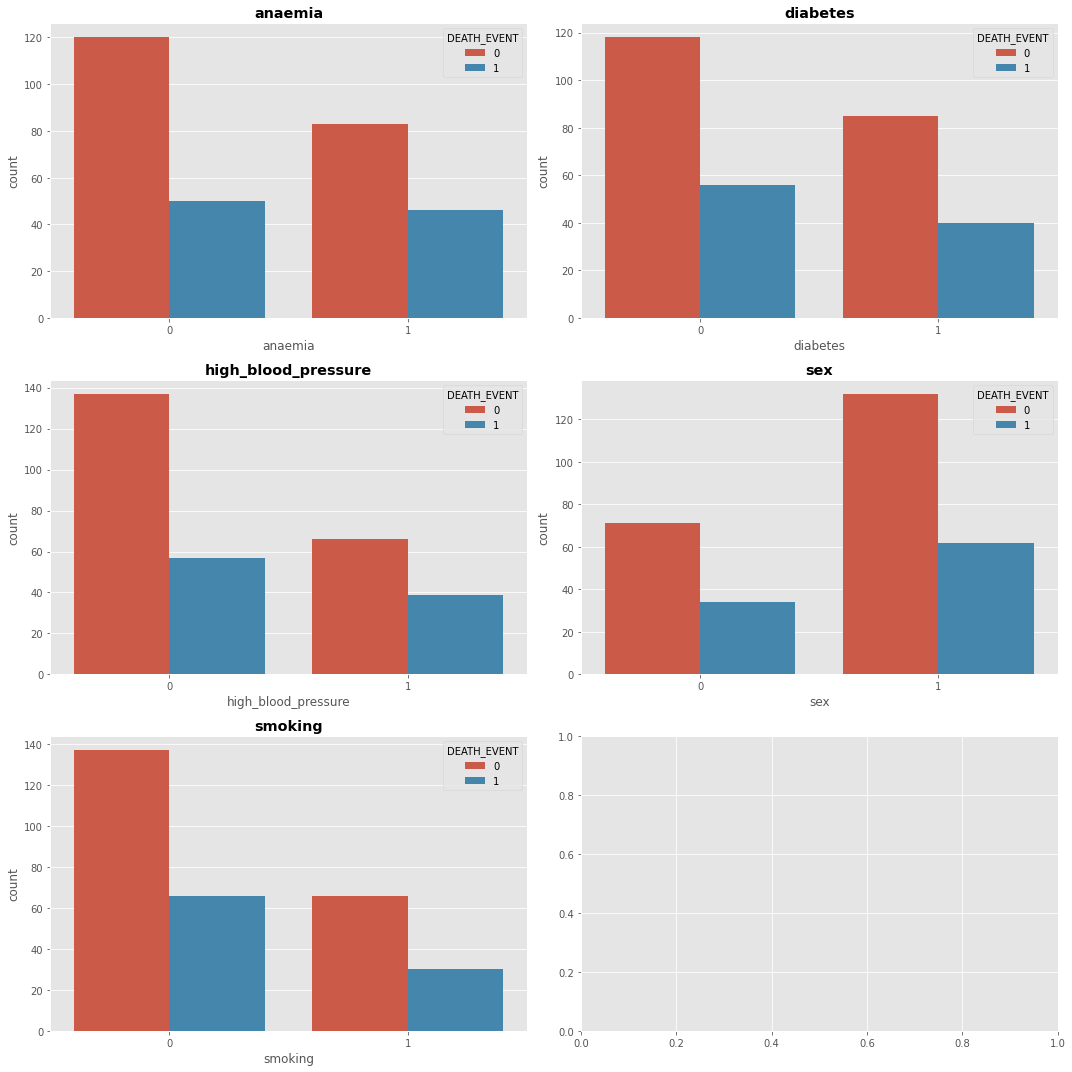

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(discrete_features):
    fltr = data[target] == 0
    vc_a = data[fltr][col].value_counts().reset_index().rename({'index' : col, col: 'count'}, axis=1)

    vc_b = data[~fltr][col].value_counts().reset_index().rename({'index' : col, col: 'count'}, axis=1)

    vc_a[target] = 0
    vc_b[target] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    sns.barplot(x = col, y = 'count', data = df , hue=target, ax=axes[i])
    axes[i].set_title(col, fontweight='bold')
plt.tight_layout()

### Discrete features Vs Target

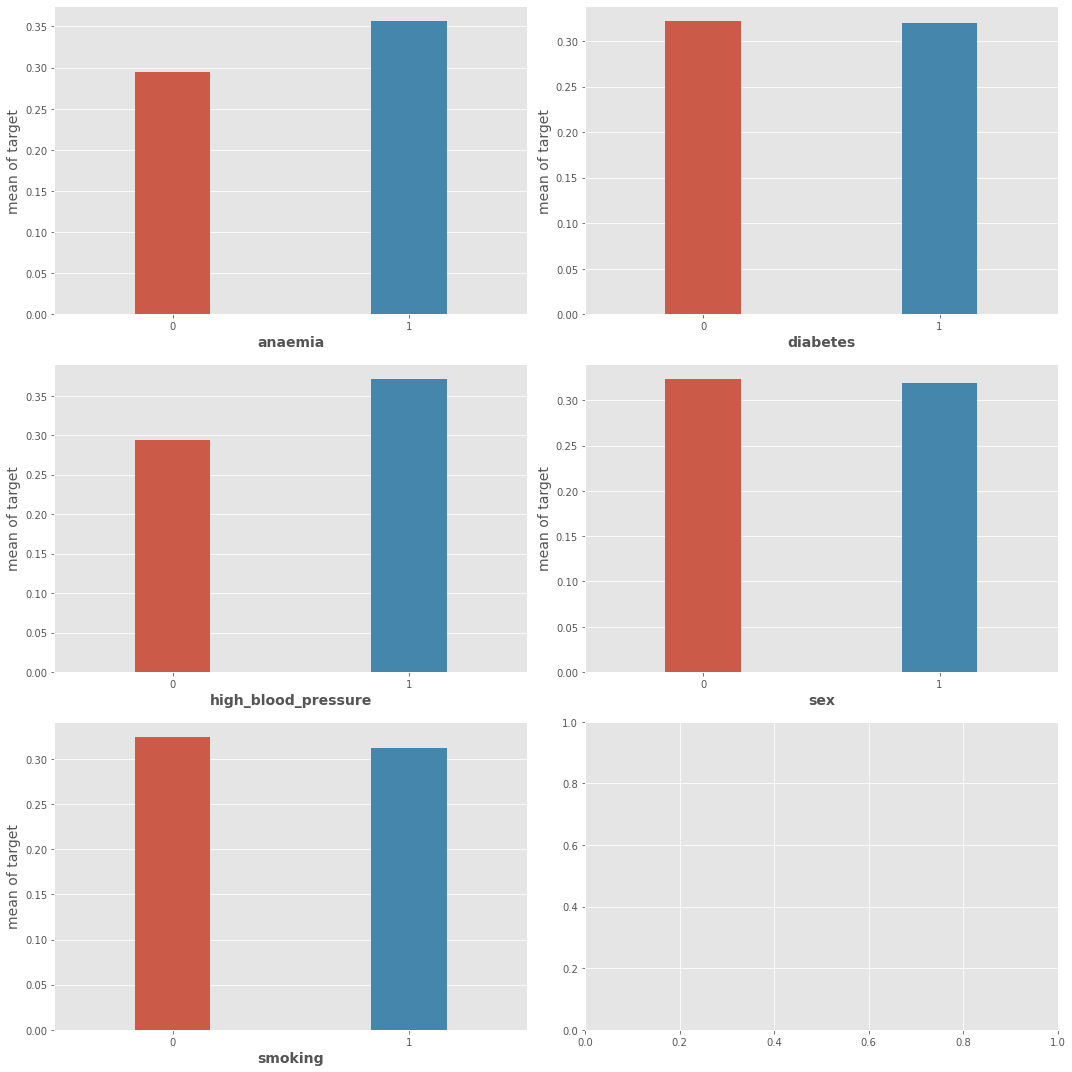

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(discrete_features):
    df = data[[c,target]].groupby(c).mean().reset_index()
    sns.barplot(df[c], df[target], ax=axes[i])
    for patch in axes[i].patches:
        height = patch.get_height()
        width = patch.get_width()
        new_width = width * 0.4
        patch.set_width(new_width)
        x = patch.get_x()
        patch.set_x(x + (width - new_width) / 2)
    axes[i].set_ylabel('mean of target', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()

### Correlation of features with target

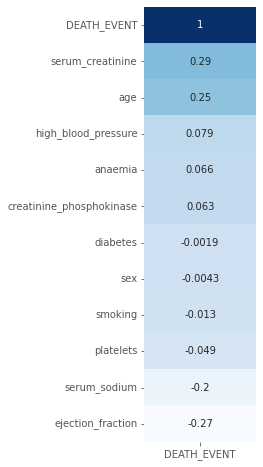

In [ ]:
corr_mat = data.corr()[target].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr_mat, cmap='Blues', cbar=False, annot=True)
plt.show()


### Train test split
<b>Training : </b>80% of data<br>
<b>Testing : </b>20% of data

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=1, stratify=data[target])

### Preprocessed data

In [ ]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

print("Train set : ", train.shape)
print("Test set : ", test.shape)

Train set :  (239, 12)
Test set :  (60, 12)


<a id="section5"></a>
# Modeling and Evaluation

<a id="tree"></a>
## Decision tree

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=1)

# training
dt_clf.fit(X_train, y_train)

train_preds = dt_clf.predict(X_train)
test_preds = dt_clf.predict(X_test)

print("Acc Score :", accuracy_score(y_train, train_preds))

print("Acc Score :", accuracy_score(y_test, test_preds))  

Acc Score : 1.0
Acc Score : 0.65


### Hyperparameter tuning

In [ ]:
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1]
}

model = DecisionTreeClassifier(random_state=1)

search = RandomizedSearchCV(model, params, scoring='accuracy', random_state=1, n_iter=80)

model = search.fit(X_train, y_train)

print("\nBest Accuracy:", model.best_score_)
print("\nBest params:", model.best_params_)


Best Accuracy: 0.7953014184397164

Best params: {'max_features': 0.6, 'max_depth': 2, 'criterion': 'gini'}


In [ ]:

final_model = DecisionTreeClassifier(random_state=1, **model.best_params_)
final_model.fit(X_train, y_train)

train_preds = final_model.predict(X_train)
test_preds = final_model.predict(X_test)

print("Train Acc Score :", accuracy_score(y_train, train_preds))
print("Test Acc Score :", accuracy_score(y_test, test_preds))  

Train Acc Score : 0.8117154811715481
Test Acc Score : 0.65


### Classification report

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.43      0.32      0.36        19

    accuracy                           0.65        60
   macro avg       0.57      0.56      0.56        60
weighted avg       0.63      0.65      0.63        60



# Post processing

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [ ]:
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [ ]:
for k in train.iloc[0].to_dict().keys():
    print(k, end=',')

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,

In [ ]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)
    
def predict_unseen(x):
    prob = model.predict_proba([x])[0][1]
    return f"{round(prob,2)*100}% chance of heart failure."

In [ ]:
predict_unseen([53.0, 0.0, 56.0, 0.0, 50.0, 0.0, 308000.0, 0.7, 135.0, 1.0, 1.0])

'14.000000000000002% chance of heart failure.'

Thank You

Prasanta Kumar Behera